In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daataset/my_data (1).csv
/kaggle/input/daataset/P09-imu-left.csv


In [2]:
df=pd.read_csv('/kaggle/input/daataset/my_data (1).csv')

In [3]:
df

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,Activity
0,1.564040e+12,-0.952393,0.288086,-0.174316,-8.841463,-7.439024,6.676829,Walking
1,1.564040e+12,-0.951172,0.289673,-0.173218,-8.750000,-7.439024,7.256098,Walking
2,1.564040e+12,-0.950317,0.290161,-0.200806,-9.420732,-7.225610,16.006098,Walking
3,1.564040e+12,-0.950195,0.288696,-0.196899,-9.451220,-7.103659,16.493902,Walking
4,1.564040e+12,-0.952148,0.289307,-0.193115,-8.506098,-7.286585,17.073171,Walking
...,...,...,...,...,...,...,...,...
385333,1.608020e+12,-0.031250,-0.067139,-0.113770,-7.530488,-24.908537,-40.396341,HeadShakingLeftWhileRunning
385334,1.608020e+12,-0.060425,0.004150,-0.126221,-10.518293,-19.512195,-47.378049,HeadShakingLeftWhileRunning
385335,1.608020e+12,-1.528076,0.388550,-0.096191,8.963415,9.634146,-35.457317,HeadShakingLeftWhileRunning
385336,1.608020e+12,-1.784668,0.478882,-0.135742,3.231707,6.524390,-33.170732,HeadShakingLeftWhileRunning


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import classification_report
RANDOM_SEED = 42
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [5]:
activities_to_remove = ['HeadShakingRightWhileRunning','HeadShakingLeftWhileRunning','HeadNodUpWhileRunning','INIT1WhileINITI','HeadYawLeftWhileRunning','HeadNodDownWhileRunning','HeadYawRightWhileRunning','INIT2WhileWalking','INIT2WhileRunning','INIT2WhileStaying','INIT1WhileINIT1']
df = df[~df['Activity'].isin(activities_to_remove)]


In [6]:
df

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,Activity
0,1.564040e+12,-0.952393,0.288086,-0.174316,-8.841463,-7.439024,6.676829,Walking
1,1.564040e+12,-0.951172,0.289673,-0.173218,-8.750000,-7.439024,7.256098,Walking
2,1.564040e+12,-0.950317,0.290161,-0.200806,-9.420732,-7.225610,16.006098,Walking
3,1.564040e+12,-0.950195,0.288696,-0.196899,-9.451220,-7.103659,16.493902,Walking
4,1.564040e+12,-0.952148,0.289307,-0.193115,-8.506098,-7.286585,17.073171,Walking
...,...,...,...,...,...,...,...,...
385040,1.600960e+12,-0.919312,-0.350952,-0.195068,-3.384146,6.280488,-9.512195,HeadShakingRightWhileStaying
385041,1.600960e+12,-0.893921,-0.355591,-0.191040,2.743902,10.701220,-8.902439,HeadShakingRightWhileStaying
385042,1.600960e+12,-0.916748,-0.333618,-0.191772,-2.530488,9.451220,-8.262195,HeadShakingRightWhileStaying
385043,1.600960e+12,-0.908691,-0.339966,-0.194824,8.567073,10.884146,-9.603659,HeadShakingRightWhileStaying


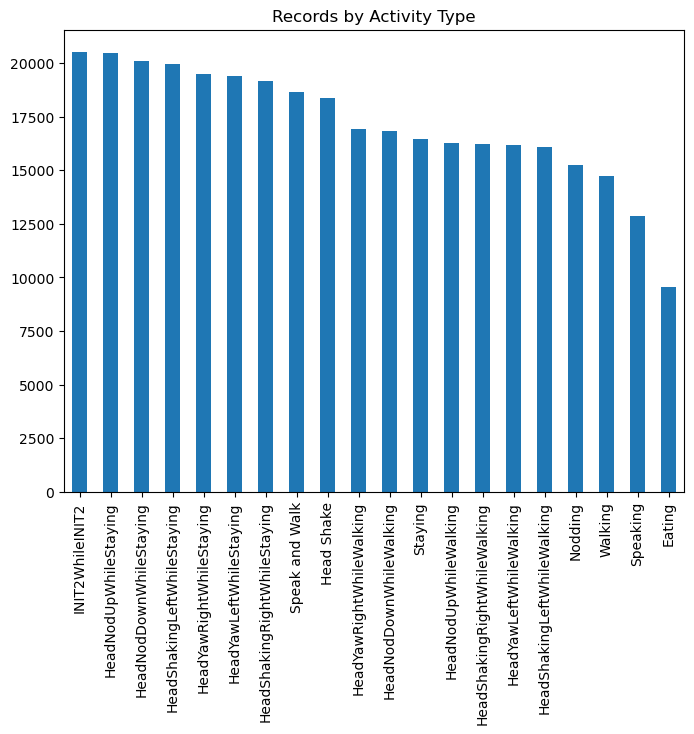

In [7]:
df['Activity'].value_counts().plot(kind='bar', title='Records by Activity Type', figsize=(8, 6),align='center');

In [8]:
X=df
y=df['Activity']

In [9]:
df['Ax'] = df['Ax'] / df['Ax'].max()
df['Ay'] = df['Ay'] / df['Ay'].max()
df['Az'] = df['Az'] / df['Az'].max()

df['Gx'] = df['Gx'] / df['Gx'].max()
df['Gy'] = df['Gy'] / df['Gy'].max()
df['Gz'] = df['Gz'] / df['Gz'].max()

# Round numbers
df = df.round({'Ax': 5, 'Ay': 5, 'Az': 5, 'Gx': 5, 'Gy': 5, 'Gz': 5})
N_TIME_STEPS = 80
N_FEATURES = 6
step = 20
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    Ax = df['Ax'].values[i: i + N_TIME_STEPS]
    Ay = df['Ay'].values[i: i + N_TIME_STEPS]
    Az = df['Az'].values[i: i + N_TIME_STEPS]
    
    Gx = df['Gx'].values[i: i + N_TIME_STEPS]
    Gy = df['Gy'].values[i: i + N_TIME_STEPS]
    Gz = df['Gz'].values[i: i + N_TIME_STEPS]
    
    label = stats.mode(df['Activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([Ax, Ay, Az, Gx, Gy, Gz])
    labels.append(label)

/tmp/ipykernel_32/744067263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ax'] = df['Ax'] / df['Ax'].max()
/tmp/ipykernel_32/744067263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ay'] = df['Ay'] / df['Ay'].max()
/tmp/ipykernel_32/744067263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [10]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [11]:
print('reshaped_segments : ', reshaped_segments.shape)
print('labels : ', labels.shape)

reshaped_segments :  (17171, 80, 6)
labels :  (17171, 20)


In [12]:
labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size=0.3)

In [14]:
X_trrain, X_teest, y_trrain, y_teest = train_test_split(X_train, y_train, test_size=0.2)

In [15]:
X_trrain.shape

(9615, 80, 6)

In [16]:
verbose = 1
epochs = 70
batch_size = 100

n_timesteps = X_trrain.shape[1]
n_features = X_trrain.shape[2]
n_outputs = y_trrain.shape[1]

print('n_timesteps : ', n_timesteps)
print('n_features : ', n_features)
print('n_outputs : ', n_outputs)

n_timesteps :  80
n_features :  6
n_outputs :  20


In [17]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding = 'same'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# fit network
history = model.fit(X_trrain, y_trrain, validation_data=(X_teest, y_teest), 
                    epochs=40, batch_size=batch_size, verbose=verbose)

Epoch 1/40
97/97 [==============================] - 4s 29ms/step - loss: 2.1007 - accuracy: 0.3305 - val_loss: 1.4143 - val_accuracy: 0.5503
Epoch 2/40
97/97 [==============================] - 2s 26ms/step - loss: 1.1910 - accuracy: 0.5813 - val_loss: 1.0816 - val_accuracy: 0.6435
Epoch 3/40
97/97 [==============================] - 2s 26ms/step - loss: 0.9603 - accuracy: 0.6668 - val_loss: 0.9154 - val_accuracy: 0.7180
Epoch 4/40
97/97 [==============================] - 3s 28ms/step - loss: 0.8236 - accuracy: 0.7175 - val_loss: 0.8661 - val_accuracy: 0.7063
Epoch 5/40
97/97 [==============================] - 3s 26ms/step - loss: 0.7041 - accuracy: 0.7634 - val_loss: 0.7680 - val_accuracy: 0.7829
Epoch 6/40
97/97 [==============================] - 2s 25ms/step - loss: 0.6235 - accuracy: 0.7977 - val_loss: 0.6668 - val_accuracy: 0.8107
Epoch 7/40
97/97 [==============================] - 3s 27ms/step - loss: 0.5501 - accuracy: 0.8224 - val_loss: 0.6278 - val_accuracy: 0.8307
Epoch 8/40
97

161/161 [==============================] - 1s 3ms/step


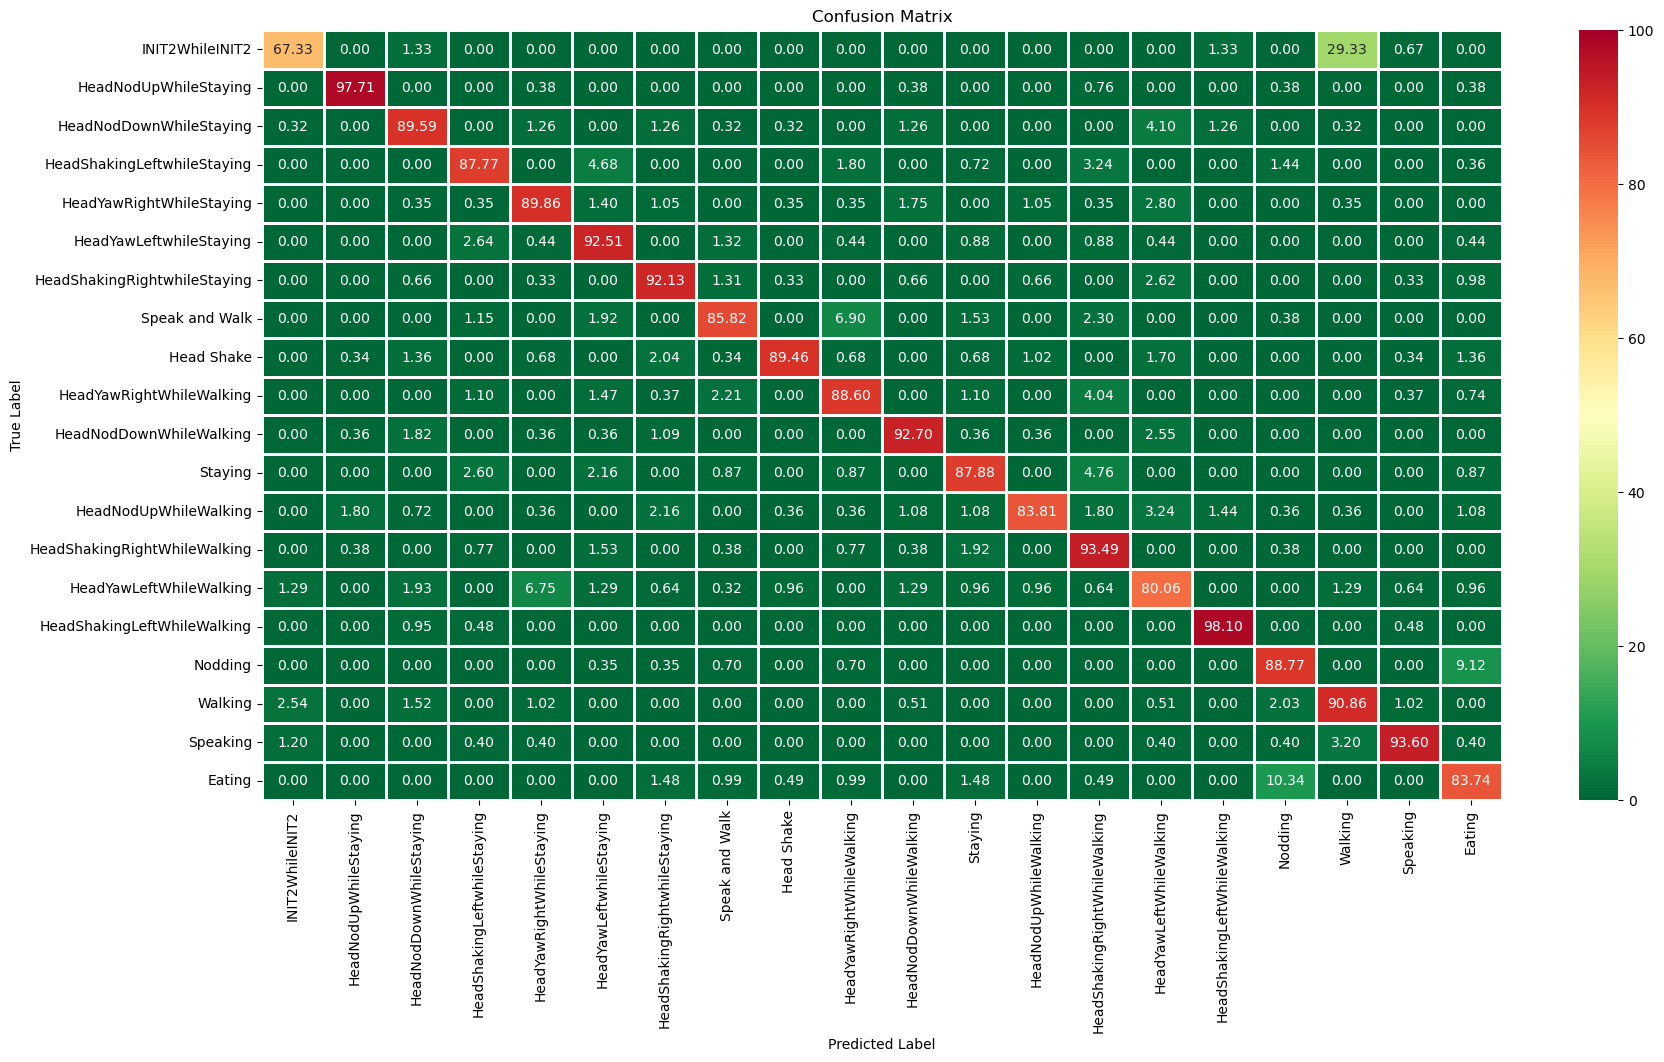

              precision    recall  f1-score   support

           0       0.89      0.67      0.77       150
           1       0.97      0.98      0.97       262
           2       0.91      0.90      0.90       317
           3       0.91      0.88      0.90       278
           4       0.88      0.90      0.89       286
           5       0.84      0.93      0.88       227
           6       0.91      0.92      0.91       305
           7       0.91      0.86      0.88       261
           8       0.97      0.89      0.93       294
           9       0.87      0.89      0.88       272
          10       0.92      0.93      0.93       274
          11       0.88      0.88      0.88       231
          12       0.95      0.84      0.89       278
          13       0.83      0.93      0.88       261
          14       0.82      0.80      0.81       311
          15       0.95      0.98      0.97       210
          16       0.88      0.89      0.88       285
          17       0.75    

In [19]:

# confusion matrix
LABELS = ['INIT2WhileINIT2','HeadNodUpWhileStaying','HeadNodDownWhileStaying','HeadShakingLeftwhileStaying','HeadYawRightWhileStaying','HeadYawLeftwhileStaying','HeadShakingRightwhileStaying','Speak and Walk','Head Shake','HeadYawRightWhileWalking','HeadNodDownWhileWalking','Staying','HeadNodUpWhileWalking','HeadShakingRightWhileWalking','HeadYawLeftWhileWalking','HeadShakingLeftWhileWalking','Nodding','Walking','Speaking','Eating']
y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

matrix = metrics.confusion_matrix(max_y_test, max_y_pred_test)
matrix = (matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis])*100
fmt = '.2f'
plt.figure(figsize=(20, 10))
sns.heatmap(matrix,
            cmap='RdYlGn_r',
            linecolor='white',
            linewidths=1,
            xticklabels= LABELS,
            yticklabels= LABELS,
            annot=True,
            fmt=fmt,
           vmax = 100)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(max_y_test, max_y_pred_test))


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy: ", accuracy_score(max_y_test, max_y_pred_test))

Accuracy:  0.890139751552795
